# Conic Hull

Since the problem is to find a conic combination of a set of points, I am going to find the conic hull, which is the smallest conic combination and the intersection of all the conic combinations. Let's start with $\mathbb{R}^2$ so we can see the plot the result and easily check if the algorithm is working properly. To achieve this, we are going to use the following Julia Packages:
<ul>
    <li>SparseArray</li>
    <li>LazySets</li>
    <li>Plots</li>
    <li>Polyhedra</li>
    <li>PyPlot</li>    
</ul>
First, we generate 100 random point of the form $(x,y)$ where $0\leq x,y \leq 100$. 

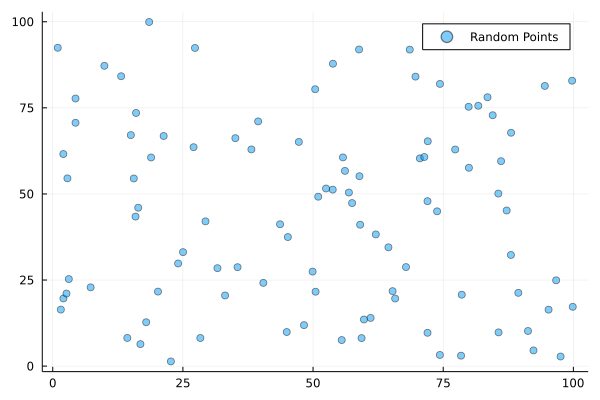

In [141]:
using SparseArrays
using Plots, LazySets
points = N -> [rand(2)*100 for i in 1:N]
v = points(100)
hull = convex_hull(v)
p = plot([Singleton(vi) for vi in v], label="Random Points", legend=:topright)

Now, we are going to find the convex hull of this points. Why? Because the conic combination is also the smallest conic combination that contains the convex hull. Thus, we are going to find first the convex hull and then, based on that result, we will find and plot the conic hull.

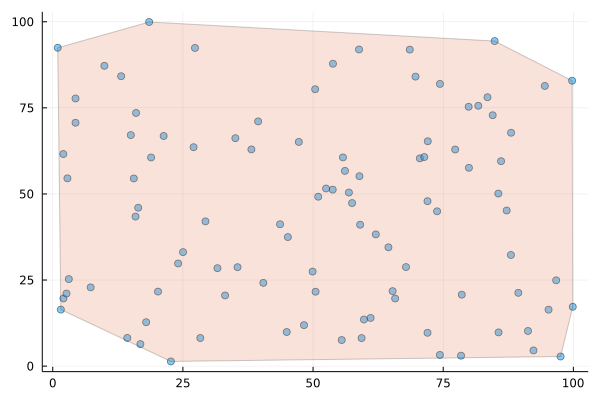

In [142]:
p = plot([Singleton(vi) for vi in v],label="Points", legend = false)
plot!(p, VPolygon(hull), alpha=0.2)

The next step is to find the lowest and highest slope of the lines formed by the points of the convex hull and the origin $(0,0)$

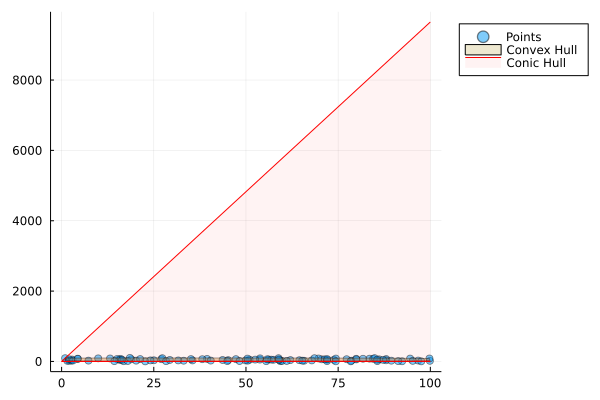

In [143]:
minimal_m = 1000000
maximal_m = -1000000
minimal_point = nothing
maximal_point = nothing
for i in hull
    if (abs(i[2]/i[1])<minimal_m)
        minimal_m = abs(i[2]/i[1])
        minimal_point = i
    end
    if (abs(i[2]/i[1])>maximal_m)
        maximal_m =abs(i[2]/i[1])
        maximal_point = i
    end    
end
f_min(x) = x*minimal_m 
f_max(x) = x*maximal_m 
p = plot([Singleton(vi) for vi in v],label="Points", legend = :outertopright)
plot!(p, VPolygon(hull), alpha=0.2)
plot!(f_min,0,100,color="red",label=false)
plot!(f_max,0,100,color="red",label=false)
plot!(p, VPolygon(hull), alpha=0.2, label="Convex Hull")
plot!(p, f_min, fillrange = f_max, 0,100,fillalpha = 0.05, color="red",label="Conic Hull")

Let's do the same exercise in $\mathbb{R}^3$ to get a better visualization.

glp_simplex: unable to recover undefined or non-optimal solution
glp_simplex: unable to recover undefined or non-optimal solution
glp_simplex: unable to recover undefined or non-optimal solution
glp_simplex: unable to recover undefined or non-optimal solution
glp_simplex: unable to recover undefined or non-optimal solution
glp_simplex: unable to recover undefined or non-optimal solution
glp_simplex: unable to recover undefined or non-optimal solution
glp_simplex: unable to recover undefined or non-optimal solution
glp_simplex: unable to recover undefined or non-optimal solution
glp_simplex: unable to recover undefined or non-optimal solution
glp_simplex: unable to recover undefined or non-optimal solution
glp_simplex: unable to recover undefined or non-optimal solution
glp_simplex: unable to recover undefined or non-optimal solution
glp_simplex: unable to recover undefined or non-optimal solution
glp_simplex: unable to recover undefined or non-optimal solution
glp_simplex: unable to re

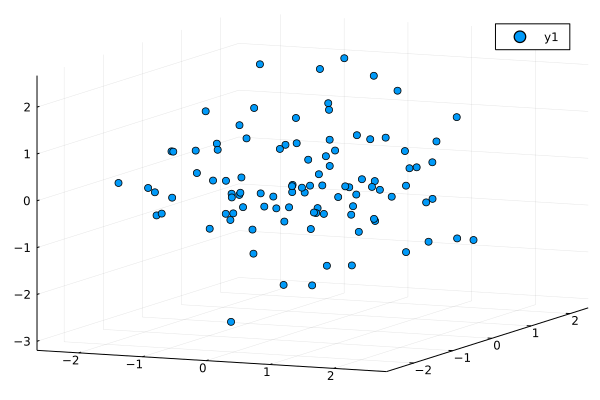

In [150]:
v3 = [randn(3) for i in 1:100]
hull3 = convex_hull(v3)
x3=[]
y3=[]
z3=[]
x=[]
y=[]
z=[]
for i in v3
    push!(x3, i[1])
    push!(y3, i[2])
    push!(z3, i[3])
end
for i in hull3
    push!(x, i[1])
    push!(y, i[2])
    push!(z, i[3])
end
scatter(x3, y3, z3)

And now, we visualize the convex hull.

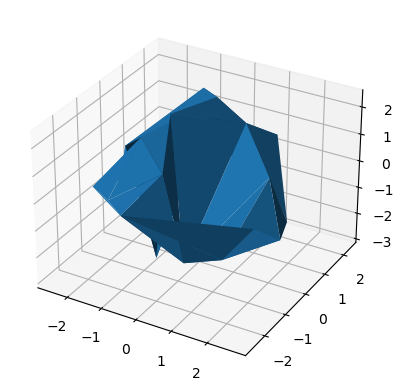

In [152]:
using PyPlot;
surf(x,y,z);